## Environment Setup

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.insert (0, './_functions_/')
from functions_eda import *

## Datasets

In [3]:
population = pd.read_csv('./raw_data/population_states.csv')
stations_state = pd.read_csv('./clean_data/stations_per_state.csv')
population.head()

,Land,Total,Area,Density
0,Baden-Württemberg,11280 257,"35747,85",316
1,Bayern,13369 393,"70541,58",190
2,Berlin,3755 251,"891,12",4214
3,Brandenburg,2573 135,"29654,38",87
4,Bremen,684864,"419,61",1632


In [5]:
stations_state.head()

,state,number_of_charging_points,number_of_stations,number_fast_charging_stations,number_regular_charging_stations
0,Baden-Württemberg,11419,5678,842,4836
1,Bayern,12367,6722,873,5849
2,Berlin,1641,954,144,810
3,Brandenburg,1440,737,152,585
4,Bremen,516,247,31,216


In [6]:
population.rename(columns = {"Land":"state", "Total":"inhabitants", "Area":"area", "Density":"population_density"}, inplace=True)

population = population.merge(stations_state, on = "state", how="left")

population.head(5)



,state,inhabitants,area,population_density,number_of_charging_points,number_of_stations,number_fast_charging_stations,number_regular_charging_stations
0,Baden-Württemberg,11280 257,"35747,85",316,11419,5678,842,4836
1,Bayern,13369 393,"70541,58",190,12367,6722,873,5849
2,Berlin,3755 251,"891,12",4214,1641,954,144,810
3,Brandenburg,2573 135,"29654,38",87,1440,737,152,585
4,Bremen,684864,"419,61",1632,516,247,31,216


In [21]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   State                            16 non-null     object
 1   Inhabitants                      16 non-null     object
 2   Area                             16 non-null     object
 3   Density                          16 non-null     int64 
 4   Number of stations               16 non-null     int64 
 5   total_number_of_charging_points  16 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 900.0+ bytes


In [7]:
# Convert types of "Area" and "Total" to int
population["area"] = population["area"].str.replace(",", "").astype(int)
population["inhabitants"] = population ["inhabitants"].str.replace(" ", "").astype(int)

population.head(16)

,state,inhabitants,area,population_density,number_of_charging_points,number_of_stations,number_fast_charging_stations,number_regular_charging_stations
0,Baden-Württemberg,11280257,3574785,316,11419,5678,842,4836
1,Bayern,13369393,7054158,190,12367,6722,873,5849
2,Berlin,3755251,89112,4214,1641,954,144,810
3,Brandenburg,2573135,2965438,87,1440,737,152,585
4,Bremen,684864,41961,1632,516,247,31,216
5,Hamburg,1892122,75509,2506,1241,616,116,500
6,Hessen,6391360,2111562,303,4745,2399,318,2081
7,Mecklenburg-Vorpommern,1628378,2329490,70,794,391,84,307
8,Niedersachsen,8140242,4770990,171,6297,3203,561,2642
9,Nordrhein-Westfalen,18139116,3411272,532,11266,5878,940,4938


In [8]:
population.columns

Index(['state', 'inhabitants', 'area', 'population_density',
       'number_of_charging_points', 'number_of_stations',
       'number_fast_charging_stations', 'number_regular_charging_stations'],
      dtype='object')

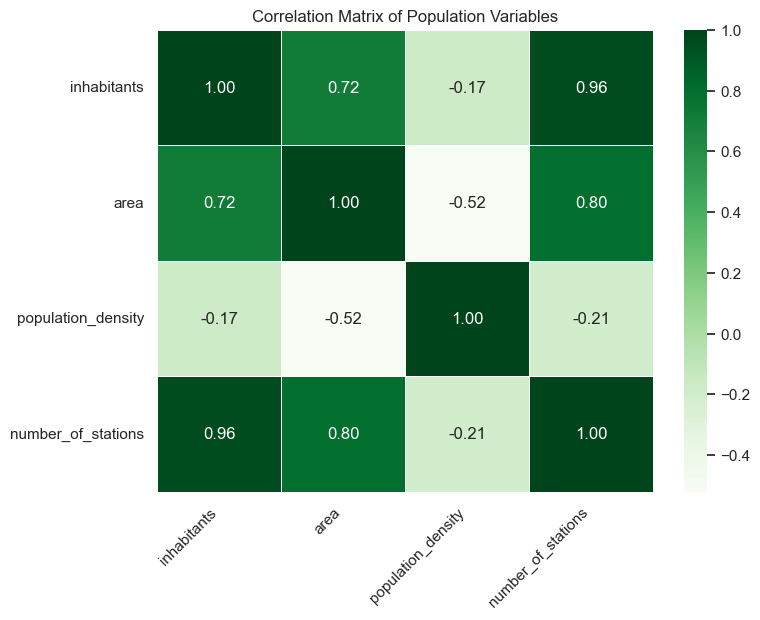

In [10]:
numbers = ['inhabitants', 'area', 'population_density', 'number_of_stations']
correlation_matrix = population[numbers].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Matrix of Population Variables")
plt.xticks(rotation=45, ha="right")
# Show the plot
plt.show()

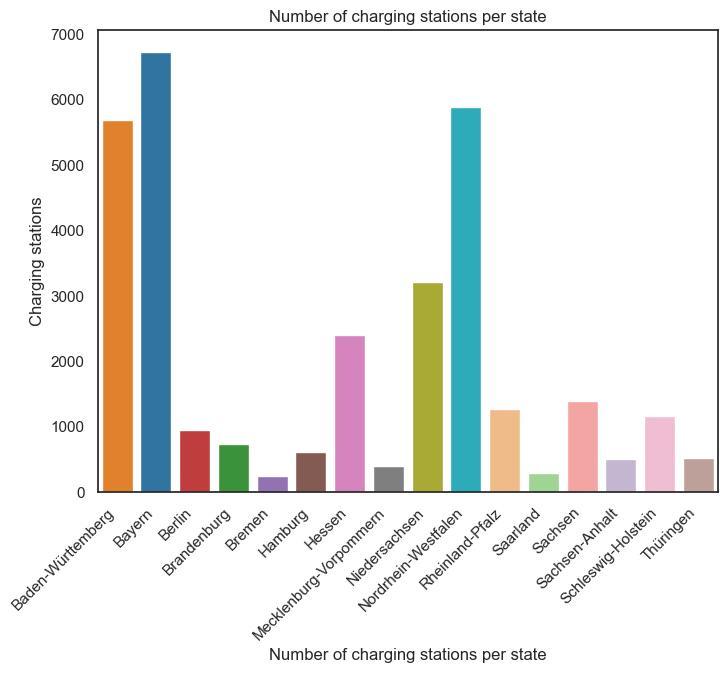

In [11]:

plt.figure(figsize=(8, 6))
sns.barplot(x = "state", y = "number_of_stations", data= population, palette = german_states_colors)
plt.ylabel ("Charging stations");
plt.xlabel("Number of charging stations per state")
plt.title("Number of charging stations per state")
# rotate the names of the states, to not polut the chart
plt.xticks(rotation=45, ha="right")

plt.show()

In [12]:
population.to_csv('./clean_data/population_states_stations.csv', index = False)